In [2]:
from keras.datasets import mnist
import numpy as np

(x_train, _), (x_test, _) = mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = np.reshape(x_train, (len(x_train), 28, 28, 1))  # adapt this if using `channels_first` image data format
x_test = np.reshape(x_test, (len(x_test), 28, 28, 1))  # adapt this if using `channels_first` image data format

Using TensorFlow backend.


11493376/11490434 [==============================] - 3s 0us/step


In [13]:
x_train.shape

(60000, 28, 28, 1)

In [3]:
from keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D
from keras.models import Model
from keras import backend as K

input_img = Input(shape=(28, 28, 1))  # adapt this if using `channels_first` image data format

x = Conv2D(16, (3, 3), activation='relu', padding='same')(input_img)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
encoded = MaxPooling2D((2, 2), padding='same')(x)

# at this point the representation is (4, 4, 8) i.e. 128-dimensional

x = Conv2D(8, (3, 3), activation='relu', padding='same')(encoded)
x = UpSampling2D((2, 2))(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
x = Conv2D(16, (3, 3), activation='relu')(x)
x = UpSampling2D((2, 2))(x)
decoded = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')








Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [5]:
autoencoder.fit(x_train, x_train,
                epochs=50,
                batch_size=128,
                shuffle=True,
                validation_data=(x_test, x_test))


Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 30s 492us/step - loss: 0.2124 - val_loss: 0.1615
Epoch 2/50
60000/60000 [==============================] - 31s 521us/step - loss: 0.1554 - val_loss: 0.1452
Epoch 3/50
60000/60000 [==============================] - 32s 531us/step - loss: 0.1420 - val_loss: 0.1376
Epoch 4/50
60000/60000 [==============================] - 35s 586us/step - loss: 0.1335 - val_loss: 0.1354
Epoch 5/50
60000/60000 [==============================] - 42s 706us/step - loss: 0.1280 - val_loss: 0.1227
Epoch 6/50
60000/60000 [==============================] - 43s 713us/step - loss: 0.1243 - val_loss: 0.1207
Epoch 7/50
60000/60000 [==============================] - 42s 706us/step - loss: 0.1215 - val_loss: 0.1232
Epoch 8/50
60000/60000 [==============================] - 81s 1ms/step - loss: 0.1197 - val_loss: 0.1162
Epoch 9/50
60000/60000 [==============================] - 53s 882us/step - loss: 0.1178 - val_l

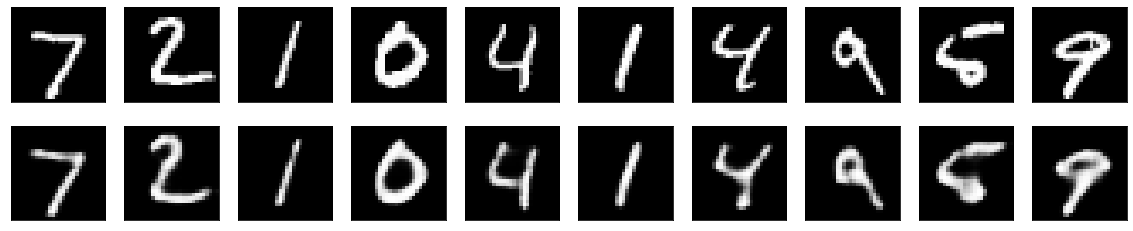

In [12]:
# use Matplotlib (don't ask)
import matplotlib.pyplot as plt

n = 10  # how many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [11]:
# encode and decode some digits
# note that we take them from the *test* set
decoded_imgs = autoencoder.predict(x_test)
